# Youtube US dataset exploratory data analysis & visualization

## Dataset columns 
- video_id
- trending_date
- title
- channel_title
- category_id
- publish_time
- tags
- views
- likes
- dislikes
- comment_count
- thumbnail_link
- comments_disabled
- ratings_disabled
- video_error_or_removed
- description

### Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pylab import rcParams
from sklearn import preprocessing


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [3]:
import plotly
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
df = pd.read_csv('USvideos.csv')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


### Checking for null values 

In [5]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [6]:
df.corr(method='pearson')

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526
video_error_or_removed,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000


In [7]:
df['category_name'] = np.nan

df.loc[(df["category_id"] == 1),"category_name"] = 'Film and Animation'
df.loc[(df["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df.loc[(df["category_id"] == 10),"category_name"] = 'Music'
df.loc[(df["category_id"] == 15),"category_name"] = 'Pets and Animals'
df.loc[(df["category_id"] == 17),"category_name"] = 'Sport'
df.loc[(df["category_id"] == 19),"category_name"] = 'Travel and Events'
df.loc[(df["category_id"] == 20),"category_name"] = 'Gaming'
df.loc[(df["category_id"] == 22),"category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23),"category_name"] = 'Comedy'
df.loc[(df["category_id"] == 24),"category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 25),"category_name"] = 'News and Politics'
df.loc[(df["category_id"] == 26),"category_name"] = 'How to and Style'
df.loc[(df["category_id"] == 27),"category_name"] = 'Education'
df.loc[(df["category_id"] == 28),"category_name"] = 'Science and Technology'
df.loc[(df["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df.loc[(df["category_id"] == 25),"category_name"] = 'News & Politics'

In [8]:
print(df.category_name.value_counts())

Entertainment               9964
Music                       6472
How to and Style            4146
Comedy                      3457
People and Blogs            3210
News & Politics             2487
Science and Technology      2401
Film and Animation          2345
Sport                       2174
Education                   1656
Pets and Animals             920
Gaming                       817
Travel and Events            402
Cars and Vehicles            384
Non Profits and Activism      57
Name: category_name, dtype: int64


In [9]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People and Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


## Number of Video in each Category 

Text(0, 0.5, 'Count')

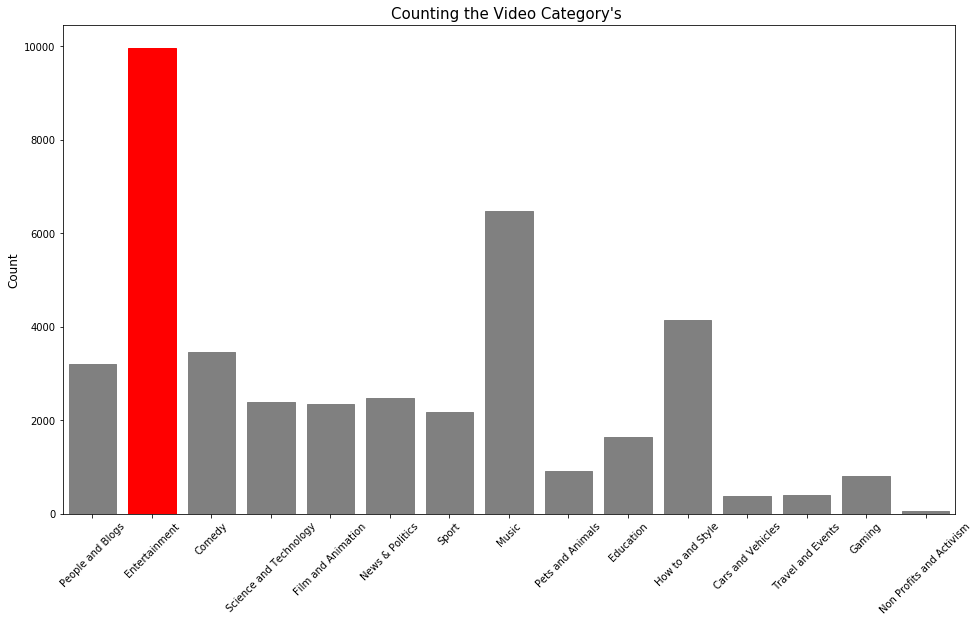

In [12]:
plt.figure(figsize = (16,9))
ax = sns.countplot(x="category_name", data=df,  orient ='H')
for bar in ax.patches:
    if bar.get_height() > 8000:
        bar.set_color('red')    
    else:
        bar.set_color('grey')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Counting the Video Category's ", fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("Count", fontsize=12)

## Views count per years

In [15]:
best_count = df[['channel_title', 'views', 'publish_time']]
best_count = best_count.sort_values('views', ascending = False)
best_count['publish_time'] = pd.DatetimeIndex(df['publish_time']).year


Text(0, 0.5, 'Count')

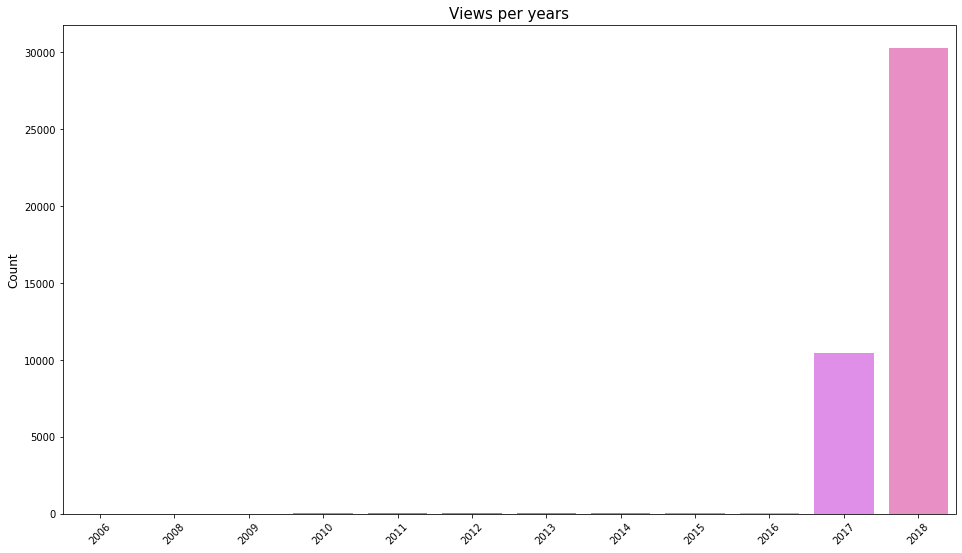

In [17]:
plt.figure(figsize = (16,9))
ax = sns.countplot(x="publish_time", data=best_count)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Views per years", fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("Count", fontsize=12)

## likes count per years

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Likes')

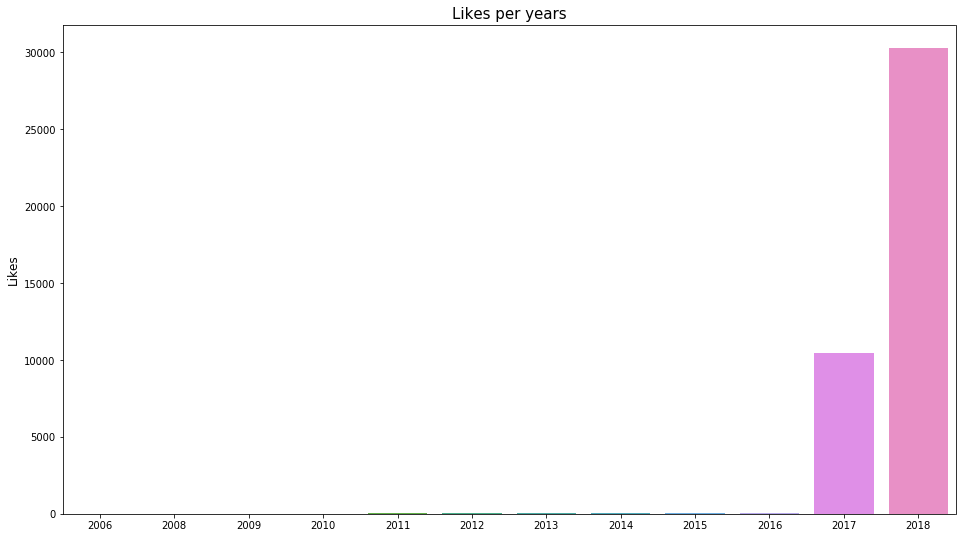

In [14]:
like= df[['likes', 'publish_time']]
plt.figure(figsize = (16,9))
like['publish_time'] = pd.DatetimeIndex(like['publish_time']).year
ax = sns.countplot(x="publish_time", data=like)
ax.set_title("Likes per years", fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("Likes", fontsize=12)

## Word Cloud To track the trend in channels

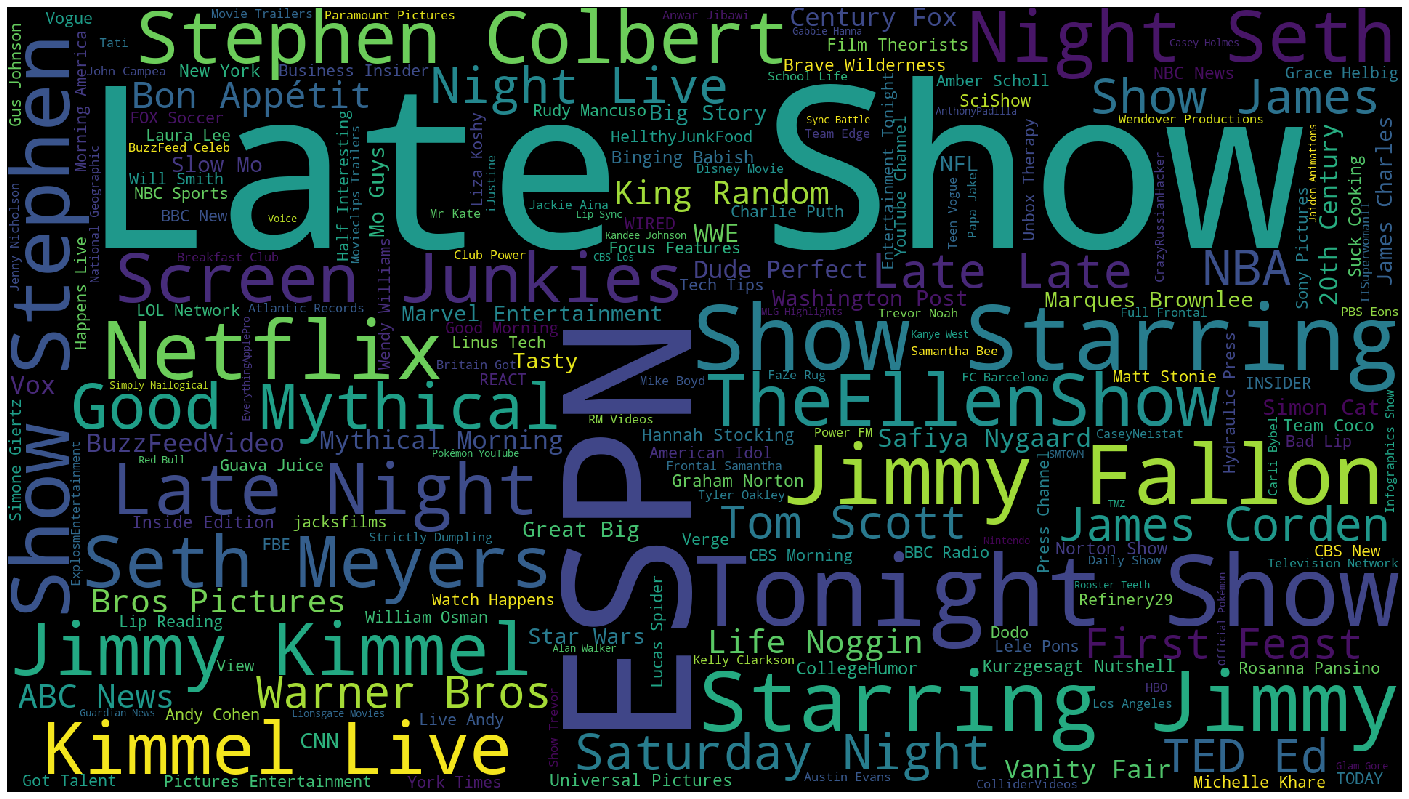

In [17]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.channel_title))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()

## Best 12 Channels view comparison 

In [19]:
Best_twl = df[['channel_title', 'views']]
Best_twl = Best_twl.groupby('channel_title')['views'].sum()
Best_twl = pd.DataFrame(Best_twl)
Best_twl = Best_twl.sort_values('views', ascending=False)
Best_twl = Best_twl[:12]
Best_twl= Best_twl.reset_index()
Best_twl.head()


,channel_title,views
0,ChildishGambinoVEVO,3758488765
1,ibighit,2235906679
2,Dude Perfect,1870085178
3,Marvel Entertainment,1808998971
4,ArianaGrandeVevo,1576959172


Text(0, 0.5, 'Views Counts')

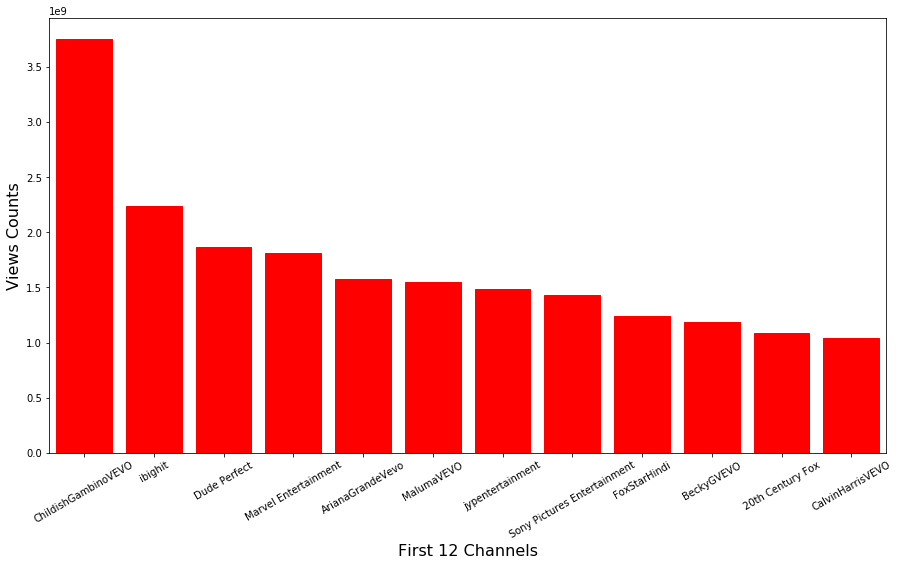

In [24]:
plt.figure(figsize=(15, 8))
c = ['red', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey']
ax = sns.barplot(data = Best_twl, x = 'channel_title', y ='views', )
ax.set_xticklabels(labels= Best_twl.channel_title, fontsize=10, rotation=30)
ax.set_xlabel(xlabel='First 12 Channels', fontsize=16)
ax.set_ylabel(ylabel='Views Counts', fontsize=16)

## Added videos in every year

In [43]:
year = df[['publish_time','video_id']]
year['publish_time'] = pd.DatetimeIndex(year['publish_time']).year
year = year.groupby('publish_time')['video_id'].count()
year = pd.DataFrame(year)
year = year.sort_values('publish_time', ascending=False)
year= year.reset_index()
year.head(11)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,publish_time,video_id
0,2018,30279
1,2017,10428
2,2016,35
3,2015,35
4,2014,32
5,2013,44
6,2012,24
7,2011,27
8,2010,19
9,2009,14


## Correlation between 'likes', 'dislikes', 'views' And category

In [32]:
df_dummies = df[['likes', 'dislikes', 'views', 'category_id']]

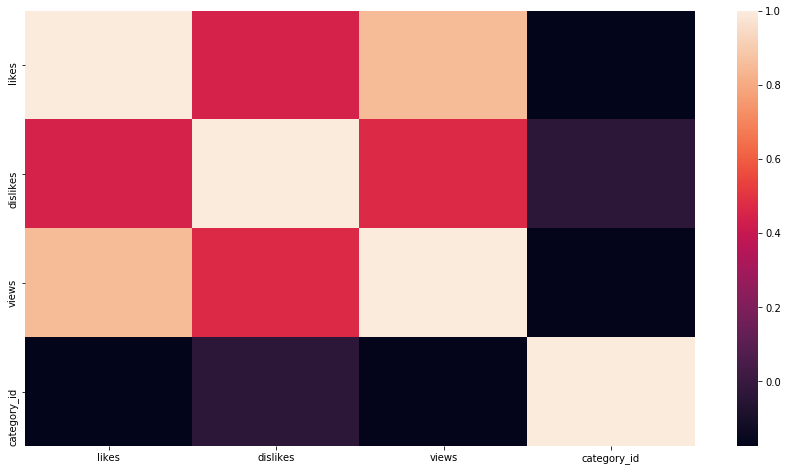

In [33]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_dummies.corr())

In [61]:
max(df)

'views'